In [1]:
from pyCodeLib import *
import warnings
import glob
import re
import numpy as np
import pandas as pd
from Bio.PDB.Polypeptide import one_to_three

warnings.filterwarnings('ignore')


# sys.path.insert(0, MYHOME)
%load_ext autoreload
%autoreload 2

In [2]:
# plt.rcParams['figure.figsize'] = [16.18033, 10]
plt.rcParams['figure.figsize'] = 0.5*np.array([16.18033, 10])
# def gamma_format_convertion_iteration_to_simulation(iteration_gamma, gamma_for_simulation):
#     # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
#     # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
#     gamma = iteration_gamma
#     gamma = -gamma  # caused by tradition.
#     # convert gamma to gamma used by simulation
#     with open(gamma_for_simulation, "w") as out:
#         c = 0
#         for i in range(20):
#             for j in range(i, 20):
#                 out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
#                 c += 1
#         out.write("\n")
#         for i in range(20):
#             for j in range(i, 20):
#                 # protein, water
#                 out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
#                 c += 1

res_type_map = {
    'A': 0,
    'C': 4,
    'D': 3,
    'E': 6,
    'F': 13,
    'G': 7,
    'H': 8,
    'I': 9,
    'K': 11,
    'L': 10,
    'M': 12,
    'N': 2,
    'P': 14,
    'Q': 5,
    'R': 1,
    'S': 15,
    'T': 16,
    'V': 19,
    'W': 17,
    'Y': 18
}
# res_type_map = gamma_se_map_1_letter = {   'A': 0,  'R': 1,  'N': 2,  'D': 3,  'C': 4,
#                             'Q': 5,  'E': 6,  'G': 7,  'H': 8,  'I': 9,
#                             'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14,
#                             'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}
res_type_map_letters = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G',
                        'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

inverse_res_type_map = dict(list(zip(list(range(20)), res_type_map_letters)))

def gamma_format_convertion_iteration_to_simulation(iteration_gamma, gamma_for_simulation, burial_gamma_for_simulation=None):
    # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
    # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
    gamma = iteration_gamma
    gamma = -gamma  # caused by tradition.
    # convert gamma to gamma used by simulation
    with open(gamma_for_simulation, "w") as out:
        c = 0
        for i in range(20):
            for j in range(i, 20):
                out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
                c += 1
        out.write("\n")
        for i in range(20):
            for j in range(i, 20):
                # protein, water
                out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
                c += 1
    if burial_gamma_for_simulation:
        rhoGamma = pd.DataFrame(gamma[630:].reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
        rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
        rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
        rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
        g = rhoGamma[["rho1", "rho2", "rho3"]].values
        np.savetxt(burial_gamma_for_simulation, g, fmt='%7.4f')





In [3]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
pre = "/Users/weilu/Research/server/feb_2019/optimization_with_biased_iter1/gammas/"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
A_name = pp + "_A"
B_name = pp + "_B"
B_filtered_name = pp + "_B_filtered"
P_name = pp + "_P"
Gamma_name = pp + "_gamma"
Gamma_filtered_name = pp + "_gamma_filtered"
Lamb_name = pp + "_lamb"
Lamb_filtered_name = pp + "_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = pp + "_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = pp + "_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = pp + "_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)








In [12]:

def get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, noise_iterations=10, relative_error_threshold=0.5, mode=1):
    lamb, P = np.linalg.eig(B)
    lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
    np.random.seed(10)
    cutoff_modes = []
    noisy_lamb_list = []
    for i_noise in range(noise_iterations):
        noisy_B = np.zeros((total_phis, total_phis))
        for i in range(total_phis):
            for j in range(i, total_phis):
#                 random_B_ij = np.random.normal(
#                     loc=half_B[i][j], scale=std_half_B[i][j])
                if mode == 1:
                    random_B_ij = np.random.normal(
                        loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys))
                elif mode == 2:
                    random_B_ij = np.random.normal(
                        loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys)**0.5)
                noisy_B[i][j] = noisy_B[j][i] = random_B_ij - \
                    other_half_B[i][j]

        noisy_lamb, noisy_P = np.linalg.eig(noisy_B)
        noisy_lamb, noisy_P = sort_eigenvalues_and_eigenvectors(
            noisy_lamb, noisy_P)
        noisy_lamb_list.append(noisy_lamb)
        try:
            cutoff_mode = np.where(
                np.abs(lamb - noisy_lamb) / lamb > relative_error_threshold)[0][0]
        except IndexError:
            cutoff_mode = len(lamb)
        cutoff_modes.append(cutoff_mode)

    cutoff_mode = min(cutoff_modes)
#     cutoff_mode = 10
    print("min cutoff_mode", cutoff_mode)

    filtered_lamb = np.copy(lamb)
    filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(
        filtered_lamb, cutoff_mode, P)

    filtered_gamma = np.dot(filtered_B_inv, A)
    filtered_B = np.linalg.inv(filtered_B_inv)
    return filtered_gamma, filtered_B, filtered_lamb, P, lamb, noisy_lamb_list


def get_filtered_B_inv_lambda_and_P(filtered_lamb, cutoff_mode, P, method='extend_all_after_first_noisy_mode'):
    if method == 'zero_all_after_first_noisy_mode':
        filtered_lamb_inv = 1 / filtered_lamb
        # for "zeroing unreliable eigenvalues"
        filtered_lamb_inv[cutoff_mode:] = 0.0
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(filtered_lamb_inv), np.linalg.inv(P)))
        filtered_lamb = 1 / filtered_lamb_inv
    if method == 'extend_all_after_first_noisy_mode':
        # for "extending lowest reliable eigenvalue"
        filtered_lamb[cutoff_mode:] = filtered_lamb[cutoff_mode - 1]
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(1 / filtered_lamb), np.linalg.inv(P)))

    return filtered_B_inv, filtered_lamb, P


def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors





In [10]:
total_phis = 690
num_decoys = 6000



In [22]:
pwd

'/Users/weilu/opt/notebook/Optimization'

In [ ]:
os.chdir("/Users/weilu/opt/notebook/Optimization")

In [24]:
os.chdir("/Users/weilu/Research/server/feb_2019/optimization_with_biased_iter1")

In [30]:
gamma_file_name = "gammas/proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_gamma_filtered"




In [32]:
validate_hamiltonian_wei("phi_list.txt", "proteins_name_list.txt", gamma_file_name, "lammps", 6000)

ValueError: could not convert string to float: '(-9.59418+-0.00000j)'

In [26]:
z_score, e_native, e_mg, e_mg_std = evaluate_hamiltonian_wei("1fc2", "phi_list.txt", "proteins_name_list.txt", None, "lammps", 6000)



In [27]:
z_score

(30.714529557439594+0j)

In [28]:
e_native

(-1140.2693087736973+0j)

In [29]:
e_mg

-61.75527945912854

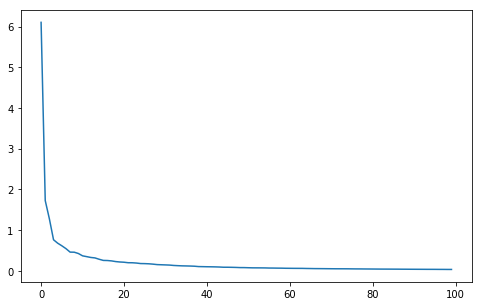

In [17]:
plt.plot(lamb[:100])

In [21]:
filtered_gamma, filtered_B, filtered_lamb, P, lamb, noisy_lamb_list = get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, mode=2)


min cutoff_mode 438


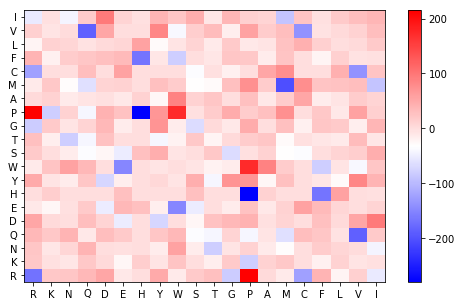

In [19]:
plot_contact_well(filtered_gamma[:210], inferBound=True, invert_sign=False)

In [15]:
rhoGamma = pd.DataFrame(filtered_gamma[630:].astype(float).reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,22.518473,6.620584,9.804887,0,A
1,ARG,-1.798650,-8.524360,-29.553309,1,R
2,ASN,35.513946,29.654402,48.752308,2,N
3,ASP,12.062799,2.152616,-3.101808,3,D
4,CYS,17.075106,-29.282504,-1.426390,4,C
5,GLN,17.808241,8.374423,24.835739,5,Q
6,GLU,-25.754676,-32.066855,-30.804984,6,E
7,GLY,-14.706492,-19.196433,-10.703004,7,G
8,HIS,17.516138,5.185796,0.000000,8,H
9,ILE,5.609815,-9.382641,-31.003939,9,I


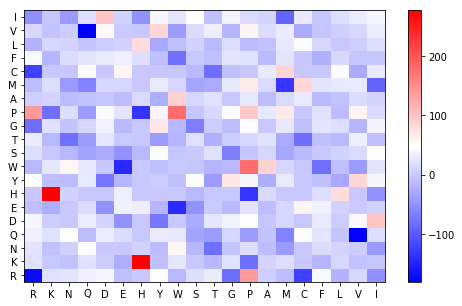

In [4]:
plot_contact_well(Gamma_filtered[:210], inferBound=True, invert_sign=False)

In [7]:
rhoGamma = pd.DataFrame(Gamma_filtered[630:].astype(float).reshape(3,20).T, columns=["rho1", "rho2", "rho3"]).reset_index()
rhoGamma["oneLetter"] = rhoGamma["index"].apply(lambda x: inverse_res_type_map[x])
rhoGamma["Residue"] = rhoGamma["index"].apply(lambda x: one_to_three(inverse_res_type_map[x]))
rhoGamma = rhoGamma[["Residue", "rho1", "rho2", "rho3", "index", "oneLetter"]]
g = rhoGamma[["rho1", "rho2", "rho3"]].values
# np.savetxt("/Users/weilu/Research/server/feb_2019/iter_burial_gamma.dat", g, fmt='%7.4f')
rhoGamma

,Residue,rho1,rho2,rho3,index,oneLetter
0,ALA,21.02257,5.68986,8.23508,0,A
1,ARG,-4.84993,-9.26003,-29.57624,1,R
2,ASN,20.14410,15.41603,48.10337,2,N
3,ASP,-2.03852,-13.83016,-24.61289,3,D
4,CYS,-322.87792,-380.41756,-408.04365,4,C
5,GLN,31.45585,21.87162,40.27171,5,Q
6,GLU,-30.77187,-36.79035,-35.34688,6,E
7,GLY,-19.70777,-25.18152,-25.75290,7,G
8,HIS,167.00113,175.83247,22.98043,8,H
9,ILE,14.46157,0.08975,-26.50159,9,I
